In [1]:
import sklearn


In [2]:
# from sklearn.metrics._scorer import _PredictScorer


In [3]:
import pandas as pd
import csv
import os
import numpy as np
# Reload the module to pick up changes
import importlib
import sys
if 'pycaret.survival_analysis.pycaret_wrapper.oop' in sys.modules:
    importlib.reload(sys.modules['pycaret.survival_analysis.pycaret_wrapper.oop'])
if 'pycaret.survival_analysis.pycaret_wrapper.metrics' in sys.modules:
    importlib.reload(sys.modules['pycaret.survival_analysis.pycaret_wrapper.metrics'])
if 'pycaret.survival_analysis.pycaret_wrapper.models' in sys.modules:
    importlib.reload(sys.modules['pycaret.survival_analysis.pycaret_wrapper.models'])
from pycaret.survival_analysis.pycaret_wrapper.oop import SurvivalExperiment
from pycaret.survival_analysis.pycaret_wrapper.oop import *
from pycaret.regression.oop import RegressionExperiment
import lifelines
from copy import deepcopy
exp1 = SurvivalExperiment()
# data_dir = '..\\csv\\'
# List the files in the current directory
files = os.listdir('./csv')
# Get the absolute path of the current directory
current_dir = os.getcwd()
# Create a DataFrame with the file names and their absolute paths
file_paths = pd.DataFrame({
    'file_name': files,
    'absolute_path': [os.path.join(current_dir, 'csv', file) for file in files]
}) 
df = pd.read_csv(file_paths['absolute_path'][0], index_col=0)
# df = pd.read_csv("../csv/SA/NKI_cleaned.csv", sep=',', encoding='utf-8')

features_to_drop = df.columns[16:]
df = df.drop(features_to_drop, axis=1)
for cols in df.columns:
    print(cols)
print("Modules reloaded successfully!")

ID
age
eventdeath
survival
timerecurrence
chemo
hormonal
amputation
histtype
diam
posnodes
grade
angioinv
lymphinfil
barcode
esr1
Modules reloaded successfully!


In [4]:
print("DataFrame columns before setup:", df.columns.tolist())
print("Target argument:", ['eventdeath', 'timerecurrence'])
print("First few rows:\n", df.head())

# Create a new experiment for debugging
exp1 = SurvivalExperiment()

# Try to manually inspect what happens during setup
print("\nBefore setup:")
print("exp1.train exists:", hasattr(exp1, 'train'))
print("exp1.X_train exists:", hasattr(exp1, 'X_train'))

# Run partial setup but catch the error
try:
    exp1.setup(data=deepcopy(df),
               target=['eventdeath', 'timerecurrence'],
               ignore_features=['Patient','ID', 'barcode'],
               keep_features=['timerecurrence'],
               fold=10,
               numeric_imputation='median',
               categorical_imputation='mode',
               imputation_type='simple',
               preprocess=True,
               normalize=False,
               n_jobs=1,
               verbose=6)
except Exception as e:
    print(f"Error during setup: {e}")
    print("Debug info:")
    print("exp1.train exists:", hasattr(exp1, 'train'))
    print("exp1.X_train exists:", hasattr(exp1, 'X_train'))
    print("exp1.dataset exists:", hasattr(exp1, 'dataset'))
    print("exp1.pipeline exists:", hasattr(exp1, 'pipeline'))
    print("exp1.idx exists:", hasattr(exp1, 'idx'))
    
    if hasattr(exp1, 'dataset'):
        print("exp1.dataset shape:", exp1.dataset.shape)
        print("exp1.dataset columns:", exp1.dataset.columns.tolist())
        print("exp1.dataset target_param:", exp1.target_param)
        
    if hasattr(exp1, 'idx'):
        print("exp1.idx:", exp1.idx)
        print("exp1.idx type:", type(exp1.idx))
        
    if hasattr(exp1, 'X_train'):
        print("exp1.X_train:", exp1.X_train)
        print("exp1.X_train type:", type(exp1.X_train))
        
    if hasattr(exp1, 'y_train'):
        print("exp1.y_train:", exp1.y_train)
        print("exp1.y_train type:", type(exp1.y_train))
        
    if hasattr(exp1, 'pipeline'):
        print("exp1.pipeline:", exp1.pipeline)
        print("exp1.pipeline steps:", exp1.pipeline.steps)
        
    # Try to call the transform method manually
    if hasattr(exp1, 'X_train') and hasattr(exp1, 'y_train') and hasattr(exp1, 'pipeline'):
        try:
            result = exp1.pipeline.transform(X=exp1.X_train, y=exp1.y_train, filter_train_only=False)
            print("Transform result:", result)
            print("Transform result type:", type(result))
        except Exception as te:
            print(f"Transform error: {te}")
    raise
else:
    print("Setup completed successfully.")
    print("exp1.train exists:", hasattr(exp1, 'train'))
    print("exp1.X_train exists:", hasattr(exp1, 'X_train'))
    print("exp1.dataset exists:", hasattr(exp1, 'dataset'))
    print("exp1.pipeline exists:", hasattr(exp1, 'pipeline'))
    print("exp1.idx exists:", hasattr(exp1, 'idx'))
    
    if hasattr(exp1, 'dataset'):
        print("exp1.dataset shape:", exp1.dataset.shape)
        print("exp1.dataset columns:", exp1.dataset.columns.tolist())
        print("exp1.dataset target_param:", exp1.target_param)
    
    if hasattr(exp1, 'idx'):
        print("exp1.idx:", exp1.idx)
        print("exp1.idx type:", type(exp1.idx))
    
    if hasattr(exp1, 'X_train'):
        print("exp1.X_train shape:", exp1.X_train.shape)
        print("exp1.X_train type:", type(exp1.X_train))
    
    if hasattr(exp1, 'y_train'):
        print("exp1.y_train shape:", exp1.y_train.shape)
        print("exp1.y_train type:", type(exp1.y_train))
    
    if hasattr(exp1, 'pipeline'):
        print("exp1.pipeline steps:", exp1.pipeline.steps)
        print("exp1.pipeline type:", type(exp1.pipeline))
        print("Pipeline steps:")
        for step_name, step in exp1.pipeline.steps:
            print(f"  {step_name}: {type(step)}")

DataFrame columns before setup: ['ID', 'age', 'eventdeath', 'survival', 'timerecurrence', 'chemo', 'hormonal', 'amputation', 'histtype', 'diam', 'posnodes', 'grade', 'angioinv', 'lymphinfil', 'barcode', 'esr1']
Target argument: ['eventdeath', 'timerecurrence']
First few rows:
          ID  age  eventdeath   survival  timerecurrence  chemo  hormonal  \
Patient                                                                    
s122     18   43           0  14.817248       14.817248      0         0   
s123     19   48           0  14.261465       14.261465      0         0   
s124     20   38           0   6.644764        6.644764      0         0   
s125     21   50           0   7.748118        7.748118      0         1   
s126     22   38           0   6.436687        6.318960      0         0   

         amputation  histtype  diam  posnodes  grade  angioinv  lymphinfil  \
Patient                                                                      
s122              1         1    

,Description,Value
0,Session id,1972
1,Target,event
2,Target type,Survival Analysis
3,Data shape,"(272, 14)"
4,Train data shape,"(190, 14)"
5,Test data shape,"(82, 14)"
6,Ignore features,3
7,Numeric features,15
8,Keep features,1
9,Preprocess,True


Setup completed successfully.
exp1.train exists: True
exp1.X_train exists: True
exp1.dataset exists: True
exp1.pipeline exists: True
exp1.idx exists: True
exp1.dataset shape: (272, 14)
exp1.dataset columns: ['age', 'survival', 'time', 'chemo', 'hormonal', 'amputation', 'histtype', 'diam', 'posnodes', 'grade', 'angioinv', 'lymphinfil', 'esr1', 'event']
exp1.dataset target_param: event
exp1.idx: [RangeIndex(start=0, stop=190, step=1), RangeIndex(start=190, stop=272, step=1)]
exp1.idx type: <class 'list'>
exp1.X_train shape: (190, 13)
exp1.X_train type: <class 'pandas.core.frame.DataFrame'>
exp1.y_train shape: (190,)
exp1.y_train type: <class 'pandas.core.series.Series'>
exp1.pipeline steps: [('numerical_imputer', SimpleImputer(strategy='median')), ('categorical_imputer', SimpleImputer(strategy='most_frequent'))]
exp1.pipeline type: <class 'pycaret.survival_analysis.pycaret_wrapper.pipeline.Pipeline'>
Pipeline steps:
  numerical_imputer: <class 'pycaret.internal.preprocess.transformers_su

In [5]:
# Check the signature of _predict_survival_function
from sksurv.linear_model import IPCRidge
import inspect

ipc_ridge = IPCRidge()
print("_predict_survival_function signature:")
print(inspect.signature(ipc_ridge._predict_survival_function))

# Let's also check how IPCRidge is supposed to be used
print("\nIPCRidge methods containing 'predict':")
for method_name in dir(ipc_ridge):
    if 'predict' in method_name.lower():
        method = getattr(ipc_ridge, method_name)
        if callable(method):
            try:
                print(f"{method_name}: {inspect.signature(method)}")
            except:
                print(f"{method_name}: signature not available")

# Let's also check what predict method returns
print("\nWhat does predict return?")
print(f"predict docstring: {ipc_ridge.predict.__doc__}")

# Check how to get survival function from IPCRidge
print("\nIPCRidge class docstring:")
print(ipc_ridge.__doc__[:500] if ipc_ridge.__doc__ else "No docstring")

# Let's also check the predict method for CoxPH since it works
from sksurv.linear_model import CoxPHSurvivalAnalysis
coxph = CoxPHSurvivalAnalysis()
print(f"\nCoxPH predict_survival_function signature:")
print(inspect.signature(coxph.predict_survival_function))

# Look at the actual implementation
print("\nLet's check how the tree model implements predict_survival_function")
from sksurv.tree import SurvivalTree
tree = SurvivalTree()
print(f"SurvivalTree predict_survival_function signature:")
print(inspect.signature(tree.predict_survival_function))

_predict_survival_function signature:
(baseline_model, prediction, return_array)

IPCRidge methods containing 'predict':
_predict_cumulative_hazard_function: (baseline_model, prediction, return_array)
_predict_function: (func_name, baseline_model, prediction, return_array)
_predict_survival_function: (baseline_model, prediction, return_array)
predict: (X)

What does predict return?
predict docstring: Predict using the linear accelerated failure time model.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = (n_samples, n_features)
            Samples.

        Returns
        -------
        C : array, shape = (n_samples,)
            Returns predicted values on original scale (NOT log scale).
        

IPCRidge class docstring:
Accelerated failure time model with inverse probability of censoring weights.

    This model assumes a regression model of the form

    .. math::

        \log y = \beta_0 + \mathbf{X} \beta + \epsilon

    L2-shrinkage is 

In [6]:
print("===========================================================")
print("available models:")
print("===========================================================")
models = exp1.models()
print(models)
print("===========================================================")
print("available metrics:")
print("===========================================================")
metrics = exp1.get_metrics()
print(metrics)
print("===========================================================")
print("metric IDs:")
print("===========================================================")
if hasattr(metrics, 'index'):
    for metric_id in metrics.index:
        print(f"  {metric_id}")

available models:
                                                 Name  \
ID                                                      
ipc_ridge                                   IPC Ridge   
coxph                                           CoxPH   
coxnet                                         CoxNet   
lasso-coxnet                              CoxNetLasso   
elastic-coxnet                            CoxNetLasso   
survival_tree                           Survival Tree   
rsf                              RandomSurvivalForest   
et_surv                            ExtraSurvivalTrees   
gb_surv                      GradientBoostingSurvival   
cwgb_surv       ComponentWiseGradientBoostingSurvival   
hloss_svm                        HingeLossSVMSurvival   
fastk_svm                       FastKernelSVMSurvival   
fast_svm                              FastSVMSurvival   
minlip_svm                          MinlipSVMSurvival   
naive_svm                            NaiveSVMSurvival   

            

In [7]:
print("===========================================================")
print("compare models:")
print("===========================================================")
# rsf                              RandomSurvivalForest   
# et_surv                            ExtraSurvivalTrees   
# gb_surv                      GradientBoostingSurvival   
# cwgb_surv       ComponentWiseGradientBoostingSurvival   
# hloss_svm                        HingeLossSVMSurvival   
# fastk_svm                       FastKernelSVMSurvival   
# fast_svm                              FastSVMSurvival   
# minlip_svm                          MinlipSVMSurvival   
# naive_svm                            NaiveSVMSurvival   
models_ = exp1.compare_models(sort='ci-ipcw', errors='raise', n_select=3, exclude=['survival_tree', 'rsf', 'et_surv', 'gb_surv', 'cwgb_surv', 'hloss_svm', 'fastk_svm', 'fast_svm', 'minlip_svm', 'naive_svm'])

compare models:


,Model,C-IC,C-II,IBS,CAUC,TT (Sec)
coxph,CoxPH,0.9028,0.8816,nan,nan,0.0100
coxnet,CoxNet,0.9020,0.8808,nan,nan,0.0100
lasso-coxnet,CoxNetLasso,0.9020,0.8808,nan,nan,0.0100
elastic-coxnet,CoxNetLasso,0.9020,0.8808,nan,nan,0.0100
ipc_ridge,IPC Ridge,0.0982,0.1268,nan,nan,0.0000


In [8]:
print("===========================================================")
print("training model:")
print("===========================================================")
model1 = exp1.create_model('ipc_ridge', cross_validation=True)

training model:


,C-IC,C-II,IBS,CAUC
Fold,,,,
0,0.1250,0.1235,nan,nan
1,0.0196,0.0195,nan,nan
2,0.2500,0.3244,nan,nan
3,0.1500,0.0739,nan,nan
4,0.0612,0.0589,nan,nan
5,0.1184,0.2768,nan,nan
6,0.0556,0.1626,nan,nan
7,0.0370,0.0326,nan,nan
8,0.1048,0.1095,nan,nan


Plotting:
Models created successfully!


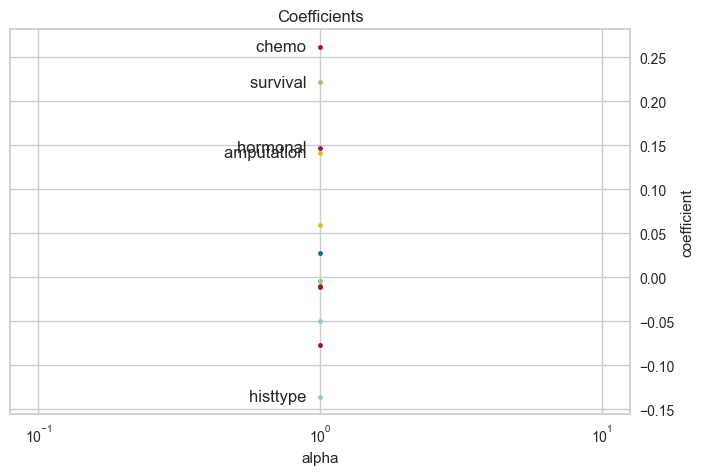

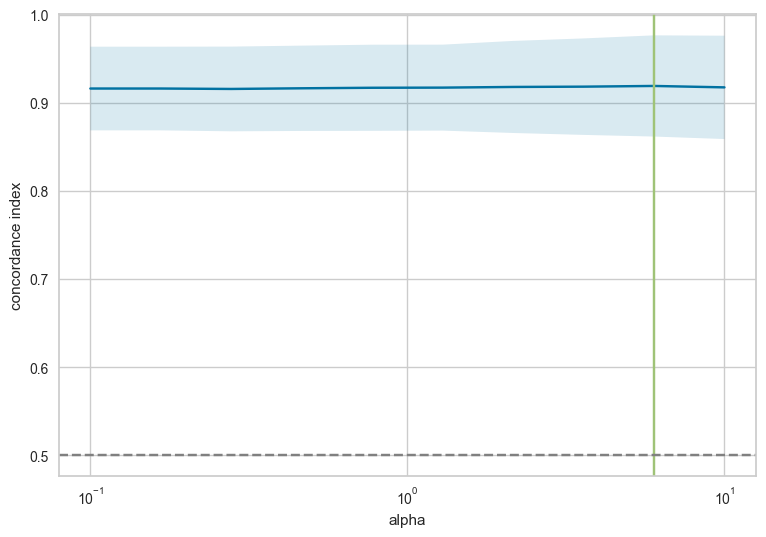

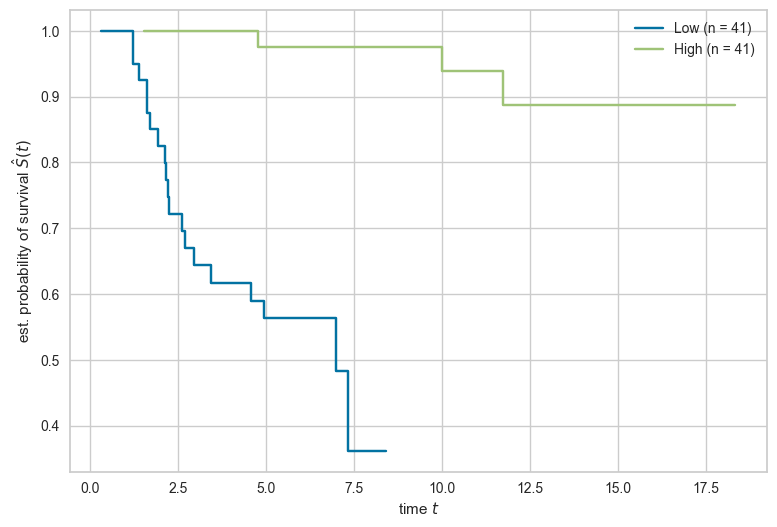

Plots generated successfully!


In [9]:
print("===========================================================")
print("Plotting:")
print("===========================================================")

# Only test plots that don't require predict_survival_function
print("Models created successfully!")
exp1.plot_model(model1, plot='plot_coefficients')
exp1.plot_model(model1, plot='plot_cindex')
exp1.plot_model(model1, 'plot_survival_curve')
# exp1.plot_model(model1, plot='plot_cauc')
# exp1.plot_model(model1, plot='plot_nzcoefs')
print("Plots generated successfully!")

,C-IC,C-II,IBS,CAUC
Fold,,,,
0,0.9125,0.9124,nan,nan
1,0.9608,0.9610,nan,nan
2,0.7188,0.6350,nan,nan
3,0.8625,0.9324,nan,nan
4,0.9184,0.9204,nan,nan
5,0.8816,0.7236,nan,nan
6,0.9861,0.9492,nan,nan
7,0.9383,0.9463,nan,nan
8,0.9194,0.9148,nan,nan


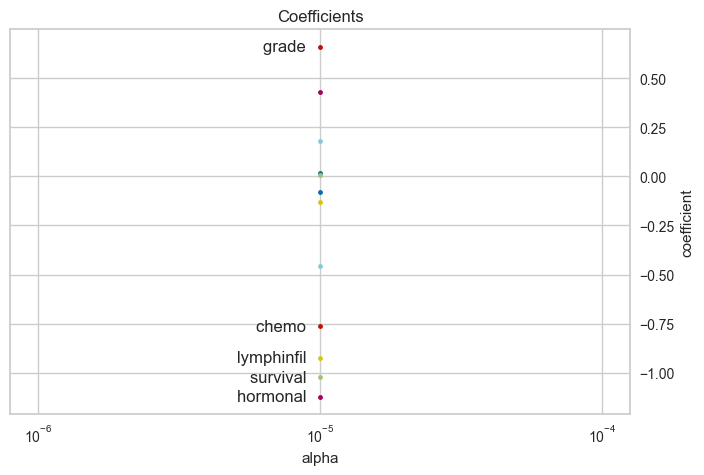

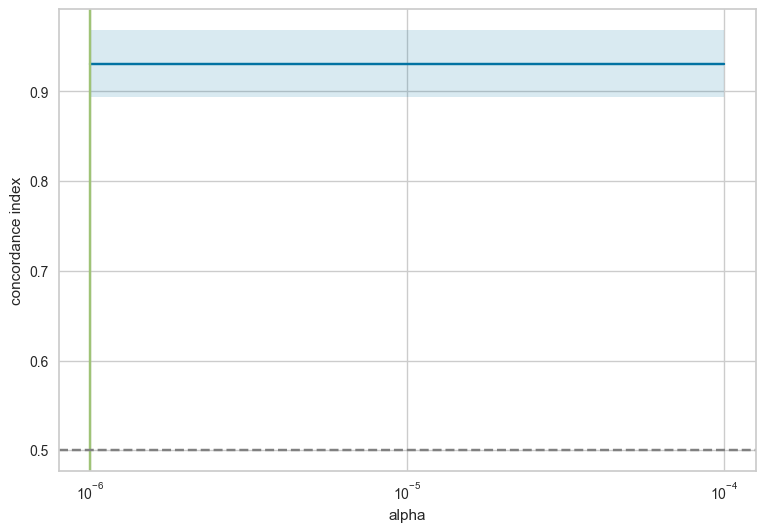

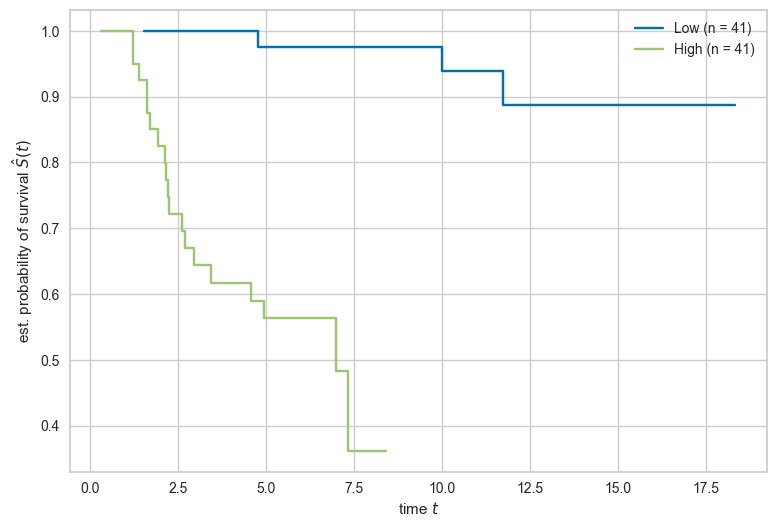

CoxPH model plots generated successfully!


In [10]:
coxph = exp1.create_model('coxph')

exp1.plot_model(coxph, plot='plot_coefficients')
exp1.plot_model(coxph, plot='plot_cindex')
exp1.plot_model(coxph, 'plot_survival_curve')
# exp1.plot_model(coxph, plot='plot_cauc')
# exp1.plot_model(coxph, plot='plot_nzcoefs')
print("CoxPH model plots generated successfully!")

In [11]:
# Restart the kernel to reload the updated modules
import sys
import importlib

# Reload the metrics module to pick up changes
if 'pycaret.survival_analysis.pycaret_wrapper.metrics' in sys.modules:
    importlib.reload(sys.modules['pycaret.survival_analysis.pycaret_wrapper.metrics'])

# Reload the models module to pick up changes
if 'pycaret.survival_analysis.pycaret_wrapper.models' in sys.modules:
    importlib.reload(sys.modules['pycaret.survival_analysis.pycaret_wrapper.models'])

print("Modules reloaded successfully!")

Modules reloaded successfully!
